In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv("../data/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## 1. Data Preprocessing 

- Step1: Check Missing Values 
- Step2: Check Duplicates 
- Step3: Check Unique Values 
- Step4: Check Data type
- Step5: Check statistics

In [6]:
## 1.1 check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Insights: Dataset have no missing values

In [7]:
## 1.2 check duplicate 
df.duplicated().sum()

np.int64(723)

Insights : There are 723 duplicated values

In [8]:
## 1.3 check unique values 
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Insights : age, trestbps, chol, thalach and oldpeak have more than 5 unique values. Rest all columns have less than 5 unique values

In [9]:
## 1.4 check datatype
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Insights: All columns contains numerical feature

In [10]:
## 1.5 check statitics 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Insights:
1. age
  - Range: 29 to 77
  - Mean: ~54.4 years, indicating most patients are middle aged or older.
  - Spread: Standard deviation ~9 indicating moderate spread.
2. sex
  - Binary variable Male=1 and Female=0
  - Mean: 0.695610, indicating higher proportion of male.
3. cp
  - Range: 0 to 3
  - Median: 1, most patients having this type.
4. trestbps
  - Range: 94 to 200
  - Mean: ~131, which is slightly above than normal range (12mmHg)
  - Spead : ~17, indicating moderate spead possible with some outliers
5. chol
  - Range: 126 to 564
  - Mean : ~246, which
  - Spead : ~51.6, indicates Higher Standard deviation due to extreme outliers
6. fbs
  - Binary variable 0 and 1
  - Mean : ~0.14, indicating only 14% patients have high fasting blood sugar.
7. restecg
  - Range : 0 to 2
  - Medium : 1, indicating most people and 1 type restecg.
8. thalach
  - Range : 73 to 202
9. exang
  - Binary variable with 1=Yes and 0=No
  - Mean : ~33% people have exang
10. oldpeak
  - Range : 0 to 6.2
  - Mean : ~1.07, with high variability (std ~1.17).
  - 75% : 75% patients have old peak under 1.8 and few outliers skews the maximum value.
11. 11. slope
  - Range : 0 to 2
  - Mean : ~1.38, most patients have 1.38 slope
12. ca
  - Range : 0 to 4
  - Mean : 0 most patients not major affected
  - 75% : 75% patients have ca below 1.
13. thal
  - Range : 0 to 4
14. target
  - Binary value with Disease=0 and Non-disease=0
  - Mean : ~51, suggests balanced dataset.

## 2. Data Visualization

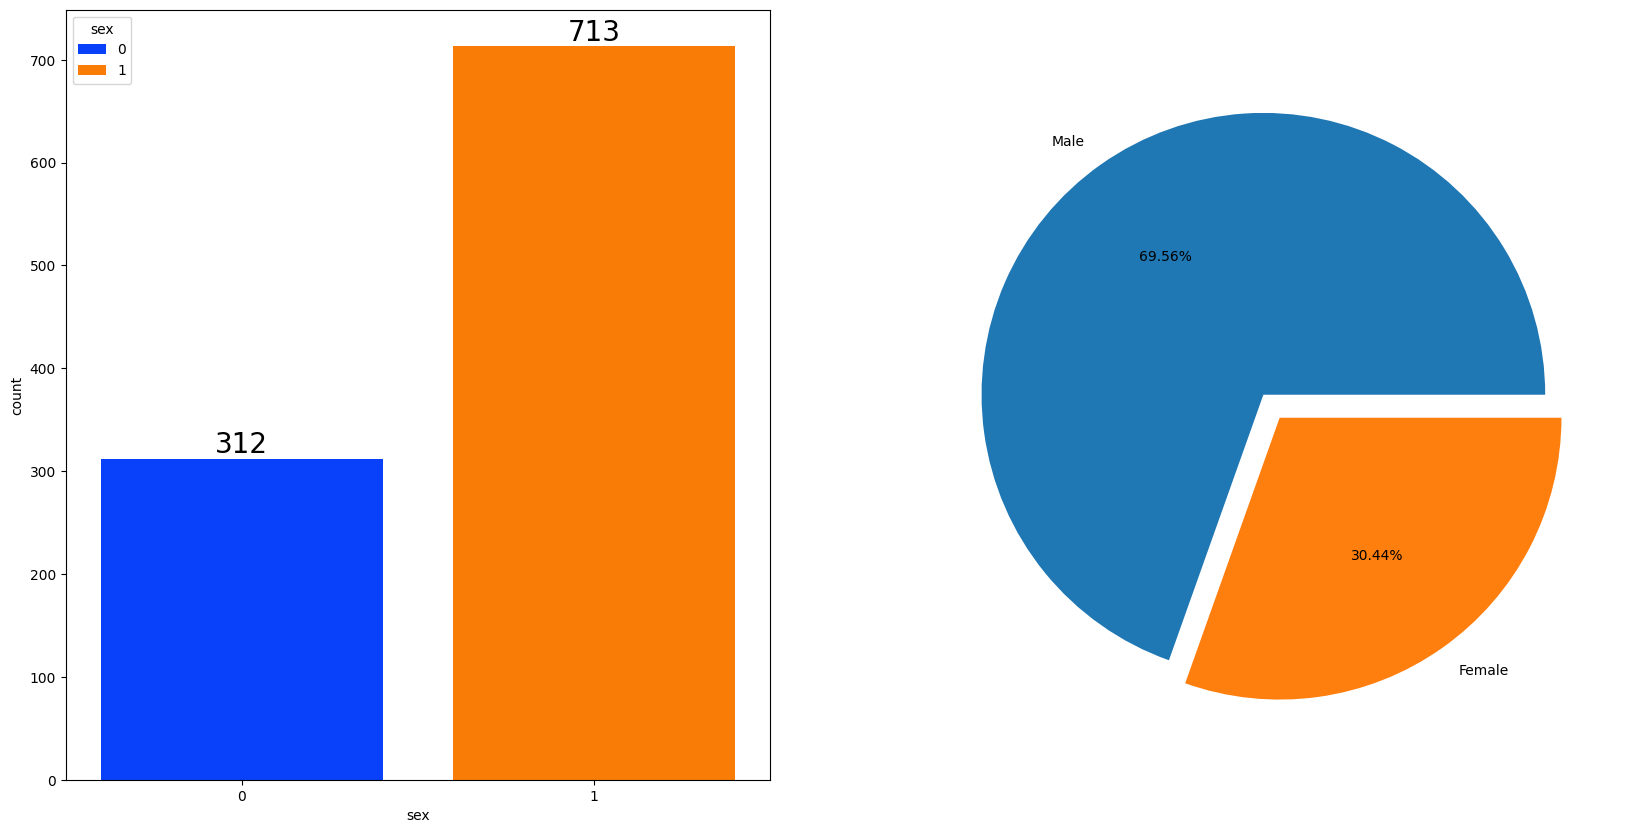

In [11]:
## 2.1 Univariate Analysis - Visualizing Gender
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.countplot(x=df['sex'], hue=df['sex'], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

plt.pie(df['sex'].value_counts(), labels=["Male", "Female"], explode=[0,0.1], autopct="%0.2f%%")
plt.show()

Insights : Male observations (713 - 69.56%) are more than female (312 - 30.44%)

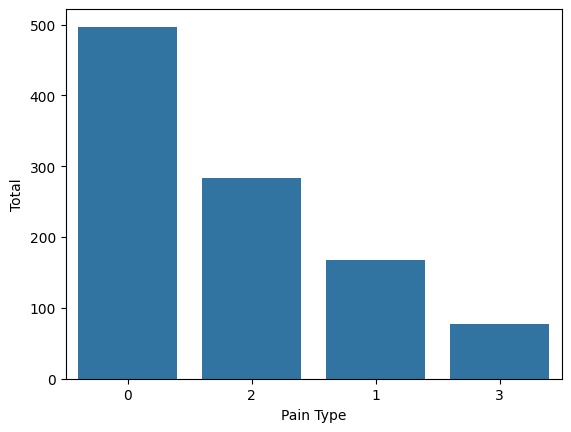

In [12]:
## 2.2 Visualize CP 
sns.countplot(x='cp', data=df, order=df['cp'].value_counts().index)
plt.xlabel("Pain Type")
plt.ylabel("Total")
plt.show()

Insights : In CP, Pain-Type-0 have more high count (~500) and Pain-Type-3 have less count (<100>)

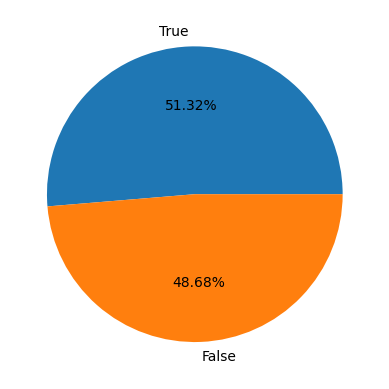

In [13]:
## 2.3 Visualizing target variable
plt.pie(df["target"].value_counts(), labels=["True", "False"], autopct="%0.2f%%")
plt.show()

Insights: Balances dataset with 51.32% of patients having heart disease and 48.68% patients not having heart disease.

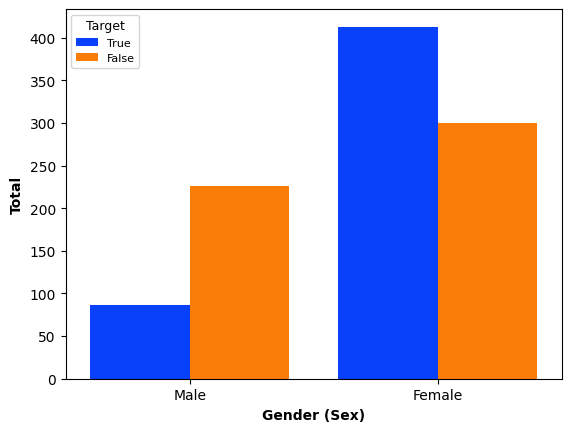

In [14]:
## 2.4 Heart disease distribution based on Gender 
label_gender = [0,1]
label_gender2 = ["Male", "Female"]
plt.xticks(label_gender, label_gender2, rotation=0)
sns.countplot(x=df['sex'], hue=df['target'], data=df, palette="bright", saturation=0.95)
plt.xlabel("Gender (Sex)", fontweight='bold')
plt.ylabel("Total", fontweight="bold")
plt.legend(labels=["True", "False"], title="Target", fontsize='8', title_fontsize='9', loc="upper left", frameon=True)
plt.show()

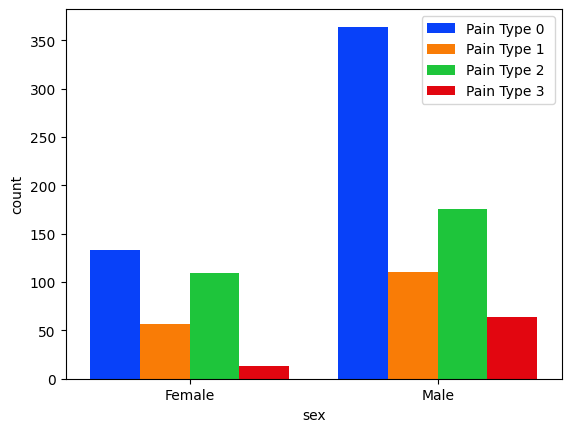

In [15]:
label_gender = [0,1]
label_gender2 = ["Female", "Male"]
sns.countplot(x=df['sex'], hue=df['cp'], data=df, palette="bright", saturation=0.95)
plt.xticks(label_gender, label_gender2)
plt.legend(['Pain Type 0', "Pain Type 1 ", "Pain Type 2", "Pain Type 3"])
plt.show()